In [ ]:
pip install scikit-learn xgboost


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/daily_room_comfort_2019_2024.csv")

# Features and target
features = [
    "temperature_C", "humidity_percent", "air_quality_index", "occupant_count",
    "system_age", "noise_level_db", "light_efficiency", "light_level_lux"
]
X = df[features]
y = df["comfort_rating"]

# Check unique values in y to ensure no mismatch
print("Unique classes in y:", np.unique(y))

# Encode target labels if necessary
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Encode both train and test target variables

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=len(np.unique(y_train))),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))  # Adjust zero_division to avoid division by zero warnings


Unique classes in y: [2 3 4 5]

🔍 Random Forest
Accuracy: 0.9151
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.94      0.93      0.93       163
           2       0.88      0.95      0.92       171
           3       1.00      0.67      0.80        30

    accuracy                           0.92       365
   macro avg       0.96      0.64      0.66       365
weighted avg       0.92      0.92      0.91       365


🔍 XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:52:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9288
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.96      0.94      0.95       163
           2       0.91      0.95      0.93       171
           3       0.85      0.77      0.81        30

    accuracy                           0.93       365
   macro avg       0.93      0.66      0.67       365
weighted avg       0.93      0.93      0.93       365


🔍 SVM
Accuracy: 0.6795
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.73      0.74      0.74       163
           2       0.64      0.74      0.69       171
           3       1.00      0.00      0.00        30

    accuracy                           0.68       365
   macro avg       0.84      0.37      0.36       365
weighted avg       0.71      0.68      0.65       365


🔍 Logistic Regression
Accuracy: 0.9562
              precision    recall  f1-score   sup

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Data Exploration ===
First 5 rows:
   id        date  temperature_C  humidity_percent  air_quality_index  \
0   1  01-01-2019           20.8              60.1                 64   
1   2  02-01-2019           20.0              52.3                 66   
2   3  03-01-2019           21.3              64.7                 65   
3   4  04-01-2019           22.8              57.0                 52   
4   5  05-01-2019           20.3              57.5                 62   

   occupant_count  system_age  noise_level_db  light_efficiency  \
0               4    0.083333              53            0.9975   
1               4    0.083333              49            0.9975   
2               4    0.083333              49            0.9975   
3               5    0.083333              38            0.9975   
4               5    0.083333              55            0.9975   

   light_level_lux  comfort_rating  
0              303               3  
1              304               3  
2      

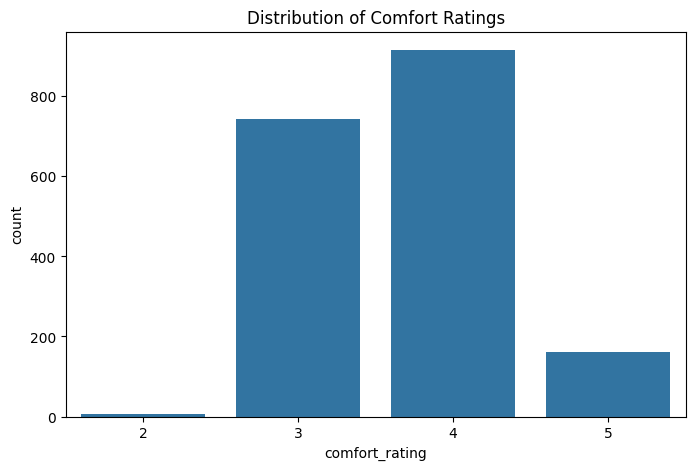

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 


=== Model Evaluation ===
Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.97      0.98      0.97       234
           4       0.94      0.98      0.96       266
           5       1.00      0.74      0.85        47

    accuracy                           0.96       548
   macro avg       0.73      0.68      0.70       548
weighted avg       0.96      0.96      0.95       548



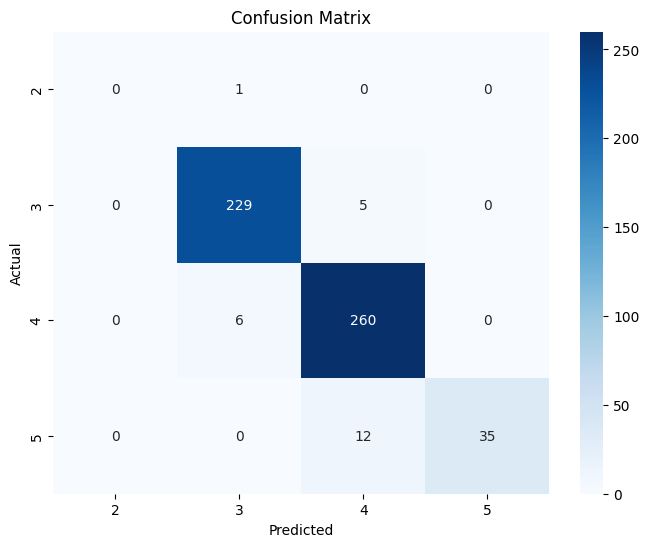

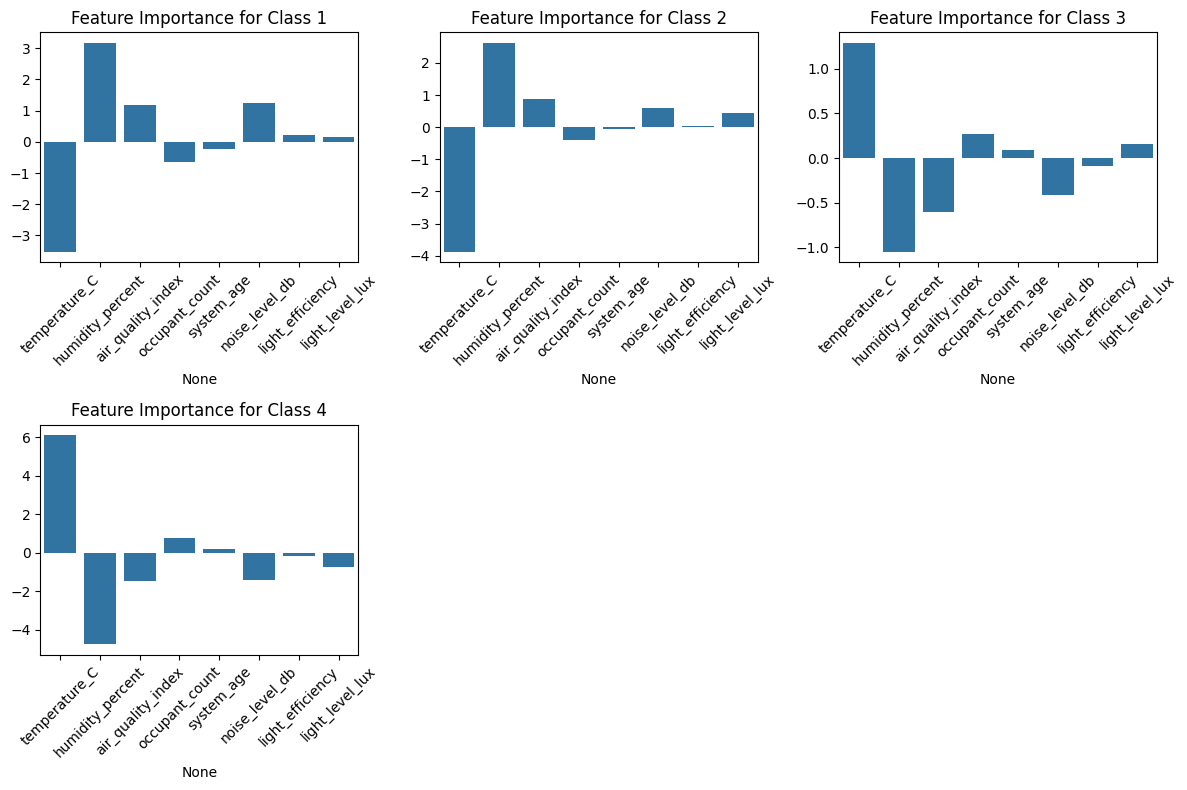

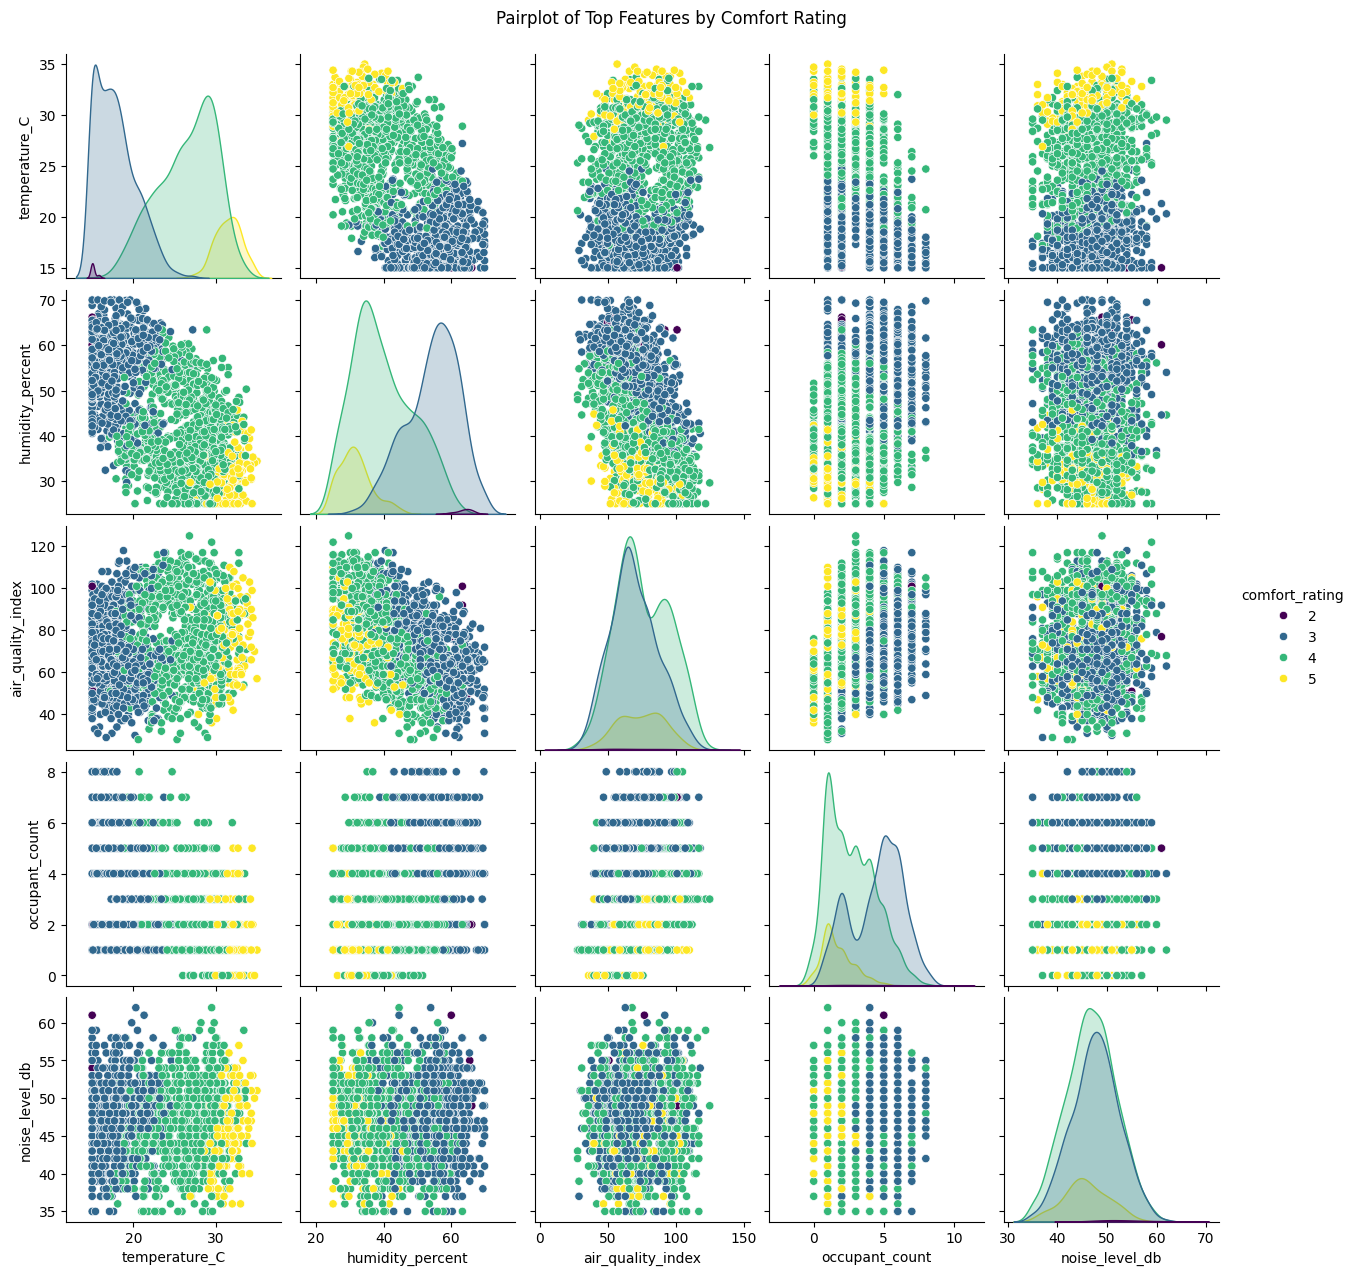


Analysis complete!


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('/content/daily_room_comfort_2019_2024.csv')

# Data cleaning - drop the last incomplete row
df = df.dropna()

# Convert comfort_rating to integer (since it's categorical)
df['comfort_rating'] = df['comfort_rating'].astype(int)

# 1. Data Exploration and Visualization
print("\n=== Data Exploration ===")
print("First 5 rows:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

# Visualize the distribution of comfort ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='comfort_rating', data=df)
plt.title('Distribution of Comfort Ratings')
plt.show()

# 2. Feature Selection and Preprocessing
# Select features and target
X = df.drop(['id', 'date', 'comfort_rating'], axis=1)
y = df['comfort_rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Logistic Regression Model
# Create and train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# 4. Model Evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Feature Importance Analysis
# Get feature importance
importance = log_reg.coef_

# Plot feature importance for each class
plt.figure(figsize=(12, 8))
for i in range(len(log_reg.classes_)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=X.columns, y=importance[i])
    plt.title(f'Feature Importance for Class {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Pairplot of Important Features
# Select top features based on importance
top_features = ['temperature_C', 'humidity_percent', 'air_quality_index', 'occupant_count', 'noise_level_db']

# Create pairplot
sns.pairplot(df[top_features + ['comfort_rating']], hue='comfort_rating', palette='viridis')
plt.suptitle('Pairplot of Top Features by Comfort Rating', y=1.02)
plt.show()

print("\nAnalysis complete!")

Missing values:
 id                   0
date                 0
temperature_C        0
humidity_percent     0
air_quality_index    0
occupant_count       0
system_age           0
noise_level_db       0
light_efficiency     0
light_level_lux      0
comfort_rating       0
dtype: int64

Comfort Rating Distribution:
comfort_rating
4    915
3    743
5    161
2      6
Name: count, dtype: int64


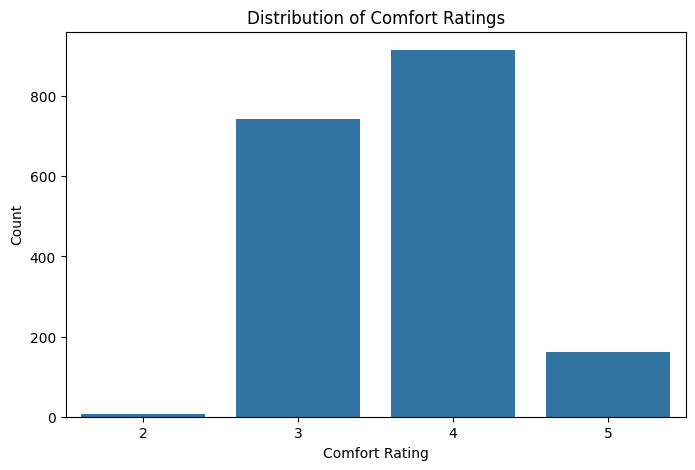


Model Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.95      0.97      0.96       234
           4       0.92      0.95      0.94       266
           5       1.00      0.68      0.81        47

    accuracy                           0.93       548
   macro avg       0.72      0.65      0.68       548
weighted avg       0.93      0.93      0.93       548



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


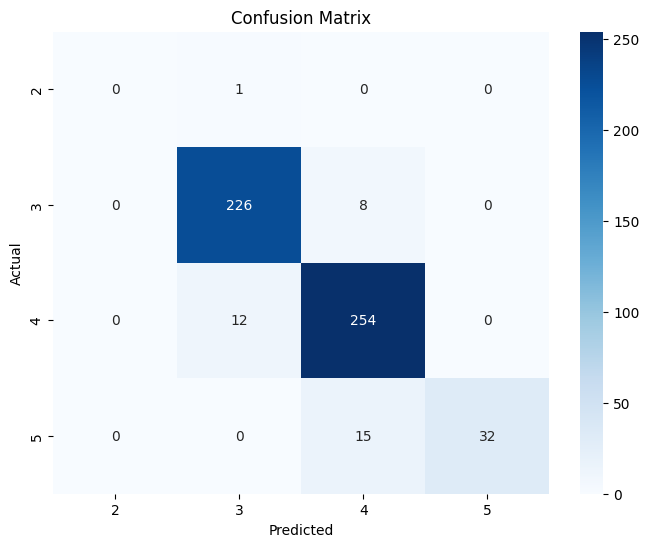

<ipython-input-8-944bee053329>:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


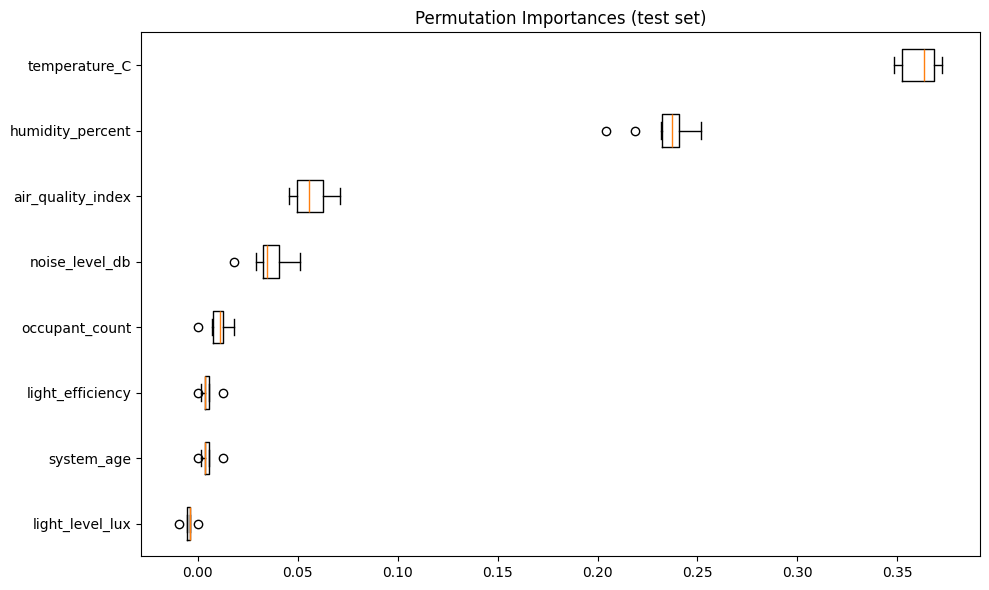

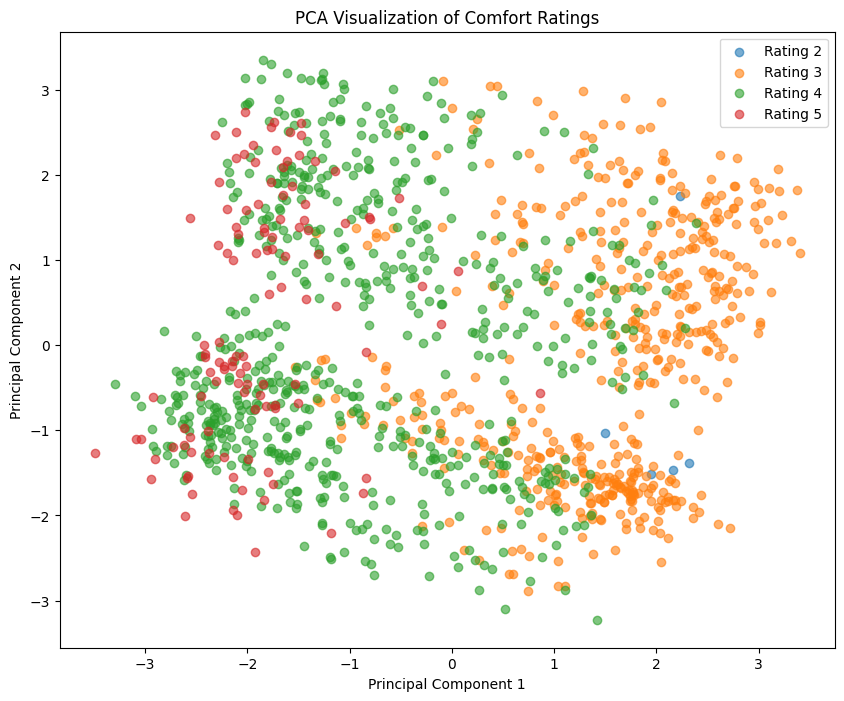

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('/content/daily_room_comfort_2019_2024.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Explore the target variable (comfort_rating)
print("\nComfort Rating Distribution:")
print(data['comfort_rating'].value_counts())

# Visualize the distribution of comfort ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='comfort_rating', data=data)
plt.title('Distribution of Comfort Ratings')
plt.xlabel('Comfort Rating')
plt.ylabel('Count')
plt.show()

# Prepare features and target
X = data.drop(['id', 'date', 'comfort_rating'], axis=1)
y = data['comfort_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization (using coefficients for linear kernel)
# Note: For non-linear kernels, we can use permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
for rating in sorted(y.unique()):
    plt.scatter(X_pca[y_train == rating, 0], X_pca[y_train == rating, 1],
                label=f'Rating {rating}', alpha=0.6)
plt.title('PCA Visualization of Comfort Ratings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Data loaded successfully!

=== Data Exploration ===
First 5 rows:
   id        date  temperature_C  humidity_percent  air_quality_index  \
0   1  2019-01-01           20.8              60.1               64.0   
1   2  2019-01-02           20.0              52.3               66.0   
2   3  2019-01-03           21.3              64.7               65.0   
3   4  2019-01-04           22.8              57.0               52.0   
4   5  2019-01-05           20.3              57.5               62.0   

   occupant_count  system_age  noise_level_db  light_efficiency  \
0             4.0    0.083333            53.0            0.9975   
1             4.0    0.083333            49.0            0.9975   
2             4.0    0.083333            49.0            0.9975   
3             5.0    0.083333            38.0            0.9975   
4             5.0    0.083333            55.0            0.9975   

   light_level_lux  comfort_rating  
0            303.0               3  
1            304.0

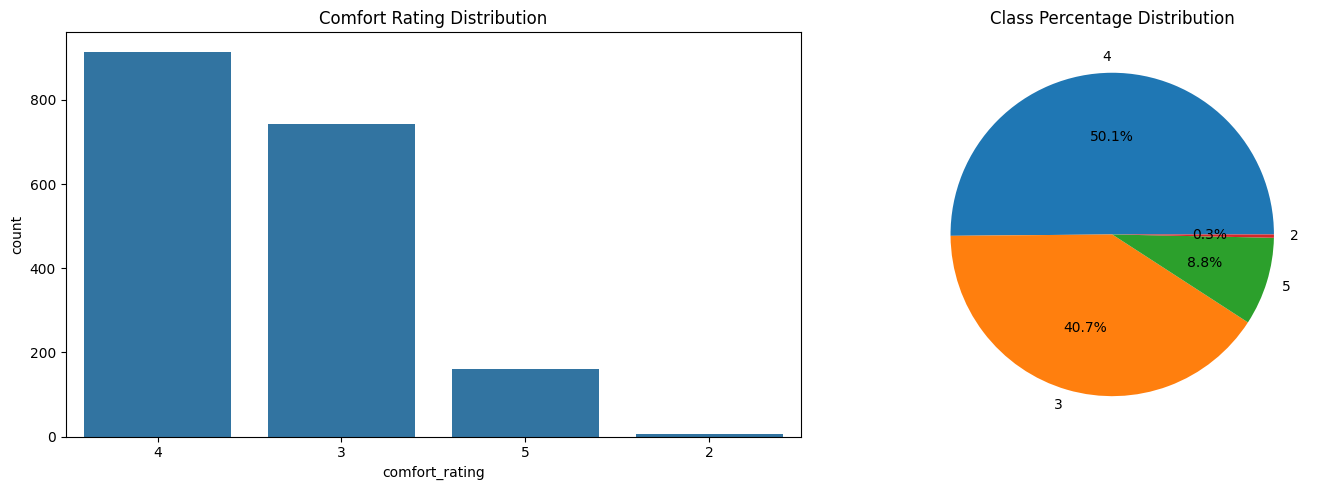


Training set class distribution: Counter({4: 640, 3: 520, 5: 113, 2: 4})
Test set class distribution: Counter({4: 275, 3: 223, 5: 48, 2: 2})

Applied SMOTE with k_neighbors=3
Resampled class distribution: Counter({4: 640, 3: 640, 2: 640, 5: 640})

=== Model Training ===
Parameter grid: {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'class_weight': ['balanced', None]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=== Model Evaluation ===
Accuracy: 0.8887
Balanced Accuracy: 0.6255

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.89      0.96      0.92       223
           4       0.91      0.88      0.89       275
           5       0.78      0.67      0.72        48



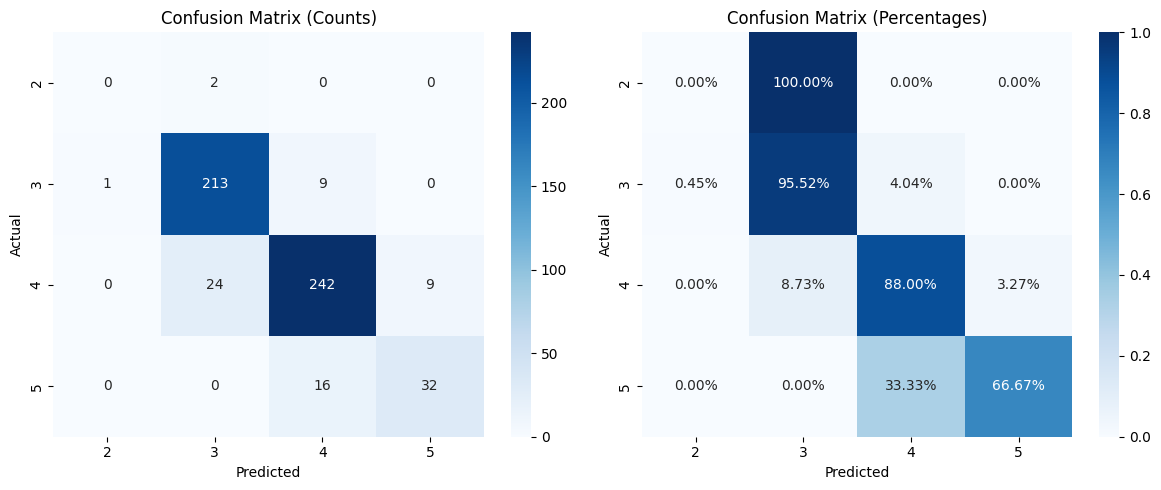

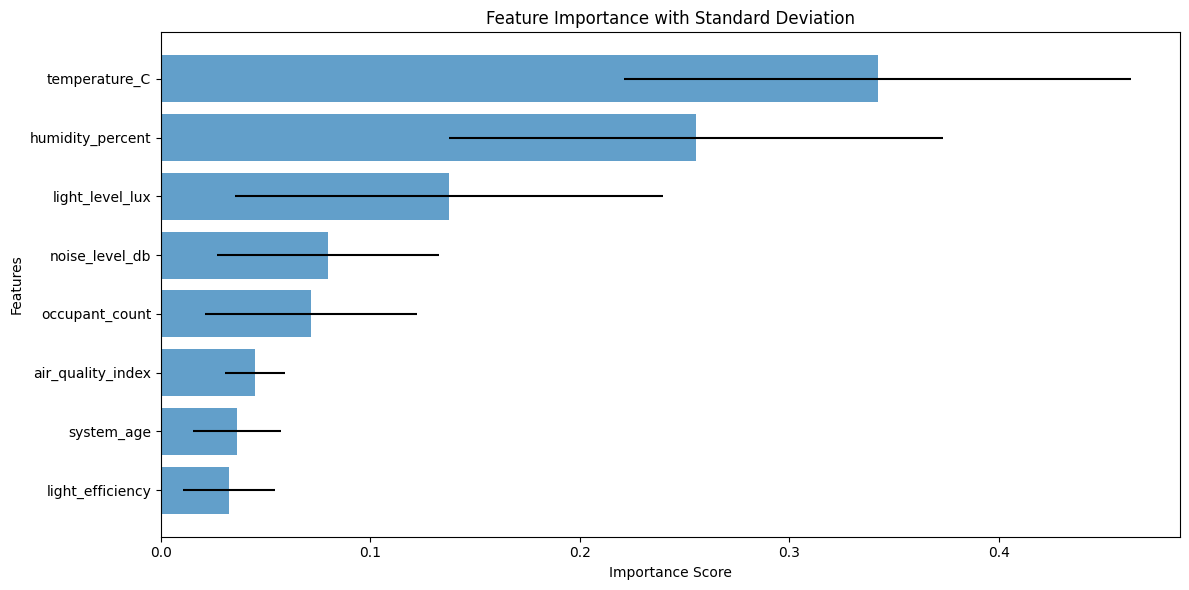


Top 5 Important Features: ['temperature_C', 'humidity_percent', 'light_level_lux', 'noise_level_db', 'occupant_count']


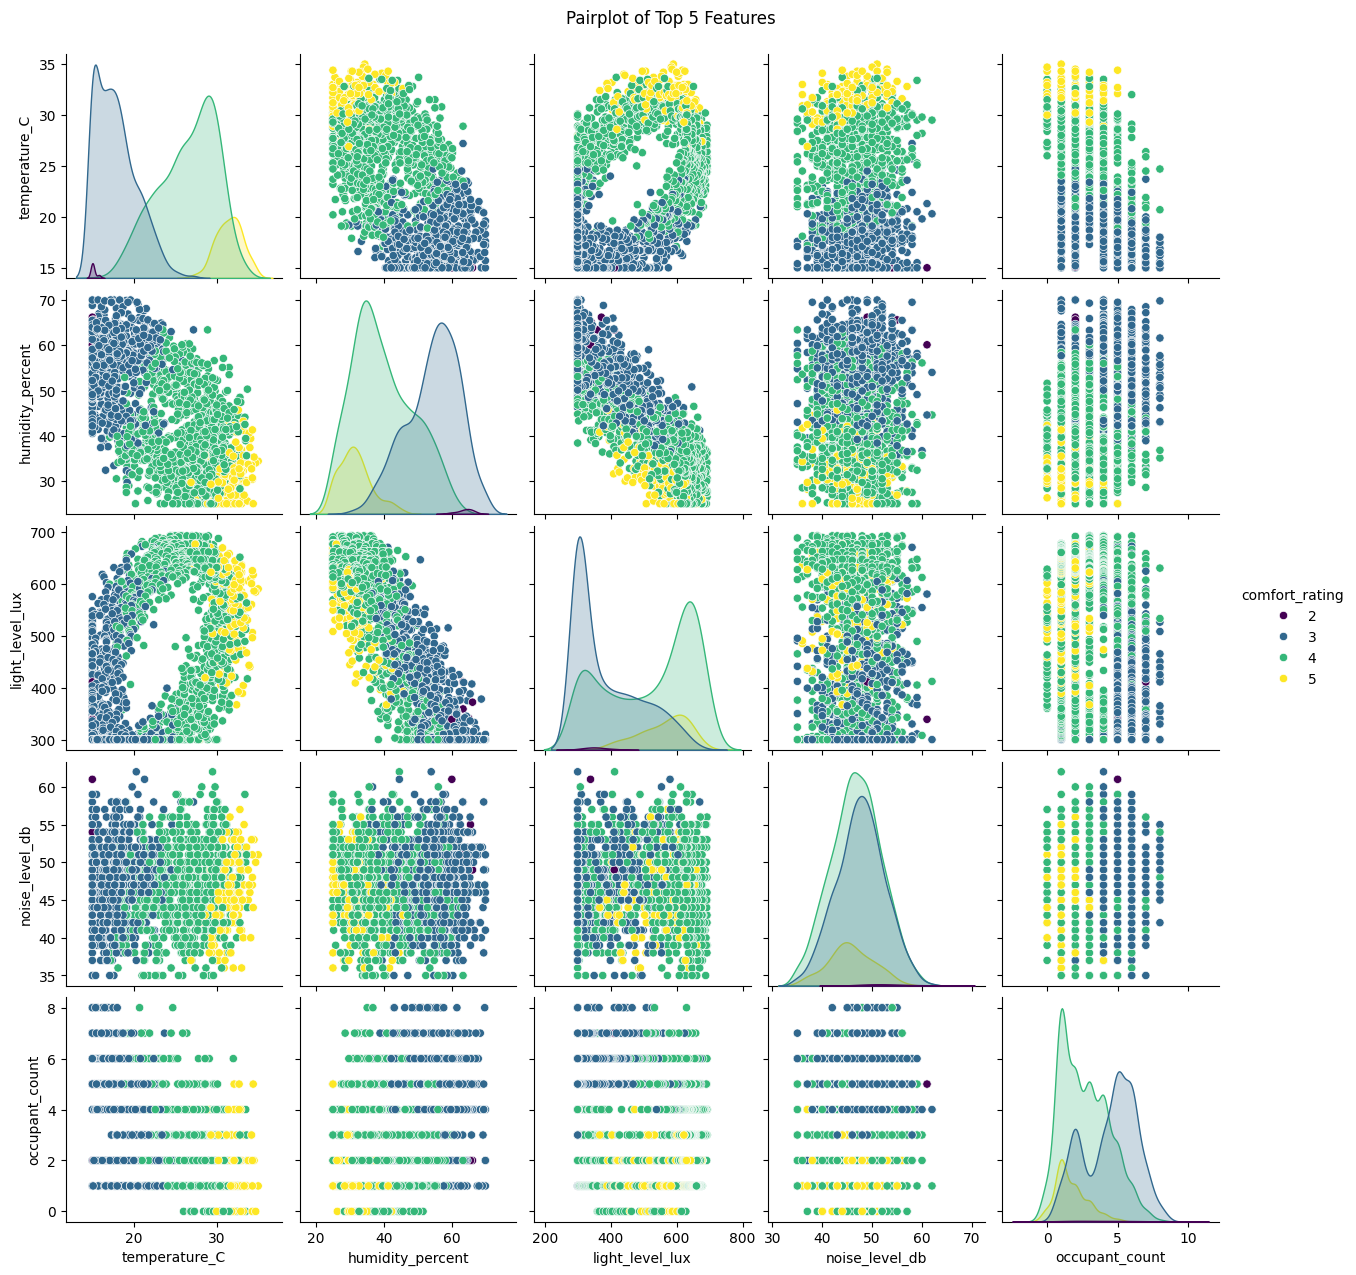

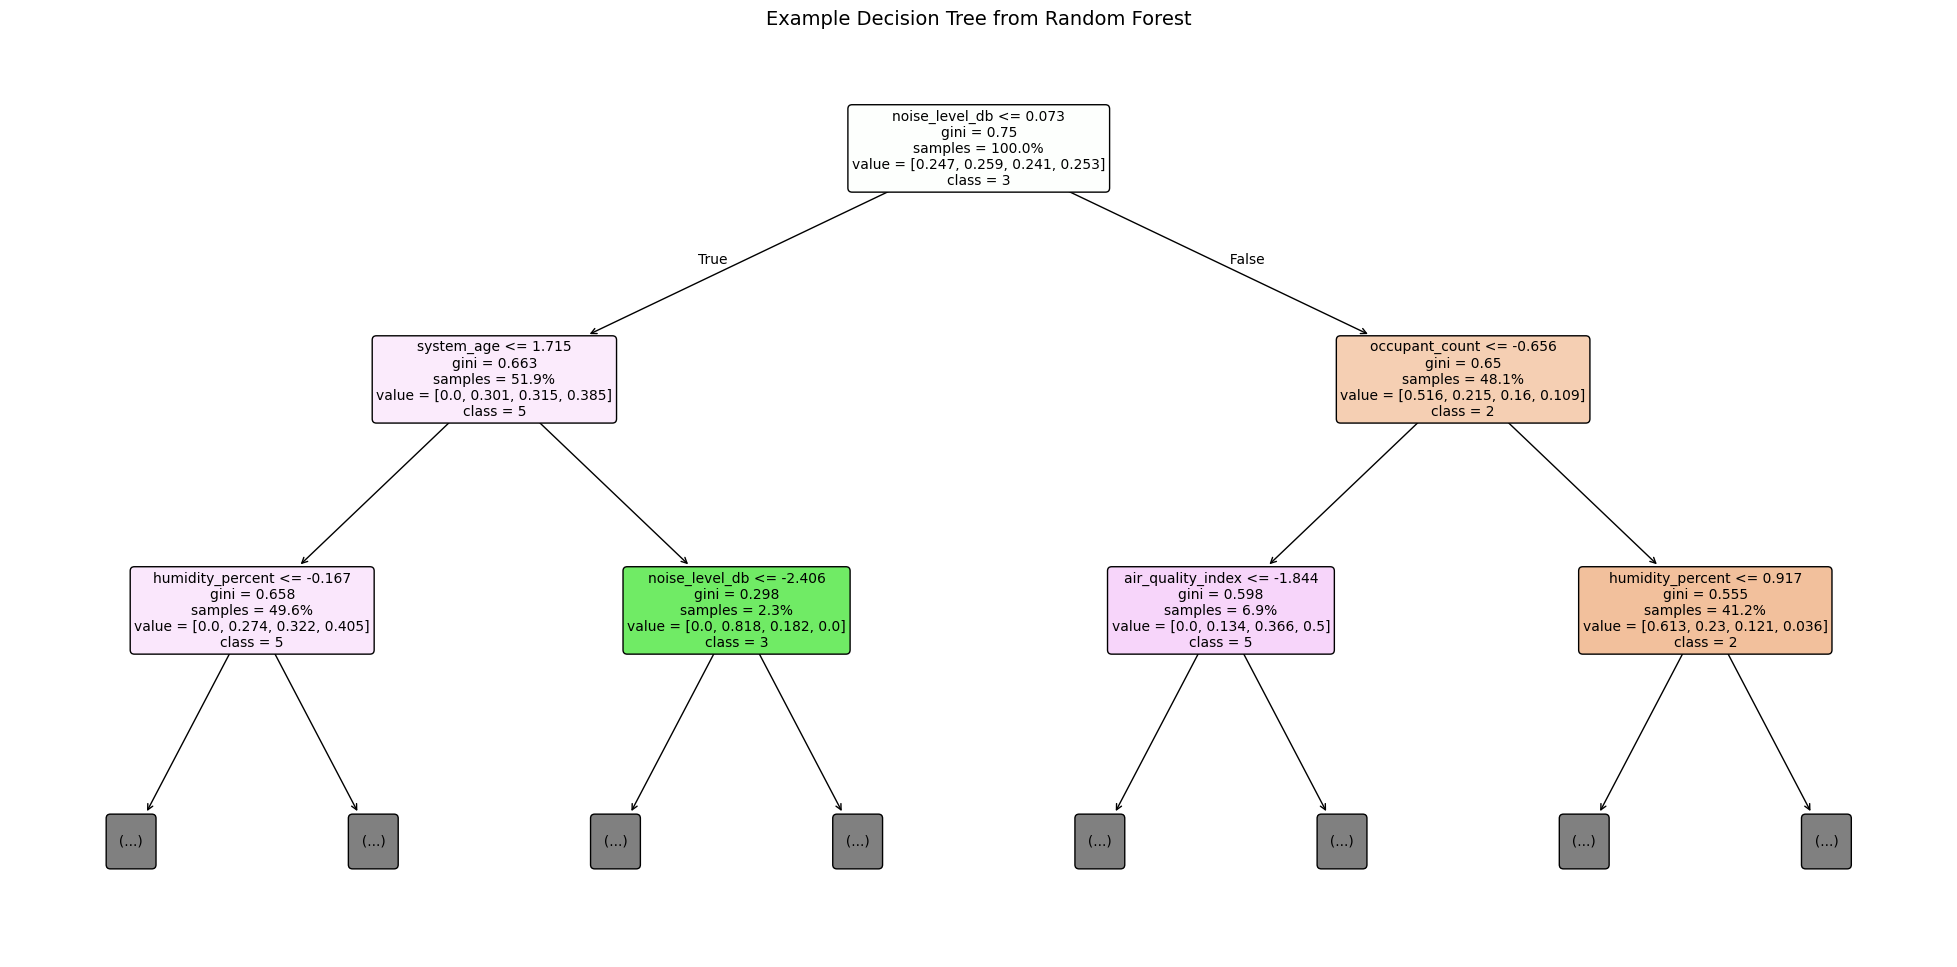


Analysis complete!


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the data
try:
    df = pd.read_csv('/content/c001.csv')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Data cleaning
df = df.dropna()
df['comfort_rating'] = df['comfort_rating'].astype(int)

# 1. Enhanced Data Exploration
print("\n=== Data Exploration ===")
print("First 5 rows:")
print(df.head())
print("\nClass distribution:")
class_dist = df['comfort_rating'].value_counts(normalize=True)
print(class_dist)
print("\nDescriptive statistics:")
print(df.describe())

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='comfort_rating', data=df, order=class_dist.index)
plt.title('Comfort Rating Distribution')

plt.subplot(1, 2, 2)
class_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Percentage Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Data Preparation
X = df.drop(['id', 'date', 'comfort_rating'], axis=1)
y = df['comfort_rating']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTraining set class distribution:", Counter(y_train))
print("Test set class distribution:", Counter(y_test))

# 3. Handle Class Imbalance
min_samples = min(Counter(y_train).values())
if min_samples > 1:
    k_neighbors = min(5, min_samples - 1)
    try:
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print(f"\nApplied SMOTE with k_neighbors={k_neighbors}")
        print("Resampled class distribution:", Counter(y_train_res))
    except Exception as e:
        print(f"\nSMOTE failed: {e}. Using original data.")
        X_train_res, y_train_res = X_train, y_train
else:
    print("\nInsufficient samples for SMOTE. Using original data.")
    X_train_res, y_train_res = X_train, y_train

# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 5. Random Forest Model with Adaptive Parameters
# Adjust parameters based on data size
n_samples = len(X_train_scaled)
n_estimators = [100] if n_samples < 500 else [100, 200]
max_depth = [None, 5] if n_samples < 1000 else [None, 10, 20]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

print("\n=== Model Training ===")
print("Parameter grid:", param_grid)

# Create StratifiedKFold separately
cv = StratifiedKFold(n_splits=min(5, min(Counter(y_train_res).values()))
)
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    scoring='balanced_accuracy'
)
grid_search.fit(X_train_scaled, y_train_res)

best_rf = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# 6. Model Evaluation
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)

print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_perc = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Counts)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_perc, annot=True, fmt='.2%', cmap='Blues',
           xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.tight_layout()
plt.show()

# 7. Feature Importance - Final Working Version
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
sorted_idx = np.argsort(importances)[::-1]

# Create properly formatted arrays
features = X.columns[sorted_idx]
importance_values = importances[sorted_idx]
std_values = std[sorted_idx]

# Create the plot using matplotlib directly
plt.figure(figsize=(12, 6))
plt.barh(range(len(features)), importance_values, xerr=std_values, align='center', alpha=0.7)
plt.yticks(range(len(features)), features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance with Standard Deviation')
plt.gca().invert_yaxis()  # Most important features on top
plt.tight_layout()
plt.show()

# 8. Top Features Analysis
top_features = features[:5]
print("\nTop 5 Important Features:", list(top_features))

# Pairplot of top features
sns.pairplot(pd.concat([X[top_features], y], axis=1),
             hue='comfort_rating', palette='viridis')
plt.suptitle('Pairplot of Top 5 Features', y=1.02)
plt.show()

# 9. Individual Tree Visualization
plt.figure(figsize=(25, 12))
plot_tree(best_rf.estimators_[0],
         feature_names=X.columns,
         class_names=[str(i) for i in np.unique(y)],
         filled=True,
         rounded=True,
         proportion=True,
         max_depth=2,
         fontsize=10)
plt.title('Example Decision Tree from Random Forest', fontsize=14)
plt.show()

print("\nAnalysis complete!")


=== Data Exploration ===
First 5 rows:
   id        date  temperature_C  humidity_percent  air_quality_index  \
0   1  2019-01-01           20.8              60.1               64.0   
1   2  2019-01-02           20.0              52.3               66.0   
2   3  2019-01-03           21.3              64.7               65.0   
3   4  2019-01-04           22.8              57.0               52.0   
4   5  2019-01-05           20.3              57.5               62.0   

   occupant_count  system_age  noise_level_db  light_efficiency  \
0             4.0    0.083333            53.0            0.9975   
1             4.0    0.083333            49.0            0.9975   
2             4.0    0.083333            49.0            0.9975   
3             5.0    0.083333            38.0            0.9975   
4             5.0    0.083333            55.0            0.9975   

   light_level_lux  comfort_rating  
0            303.0               3  
1            304.0               3  
2      

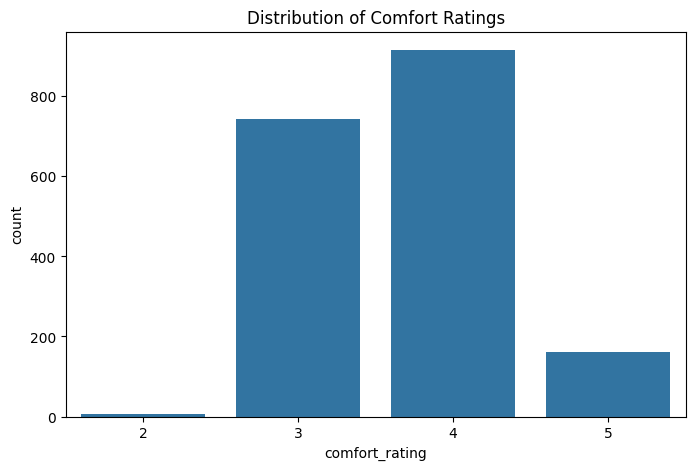

Fitting 3 folds for each of 32 candidates, totalling 96 fits

=== Model Evaluation ===
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9124

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.92      0.95      0.94       223
           4       0.94      0.89      0.92       275
           5       0.76      0.88      0.82        48

    accuracy                           0.91       548
   macro avg       0.66      0.68      0.67       548
weighted avg       0.91      0.91      0.91       548



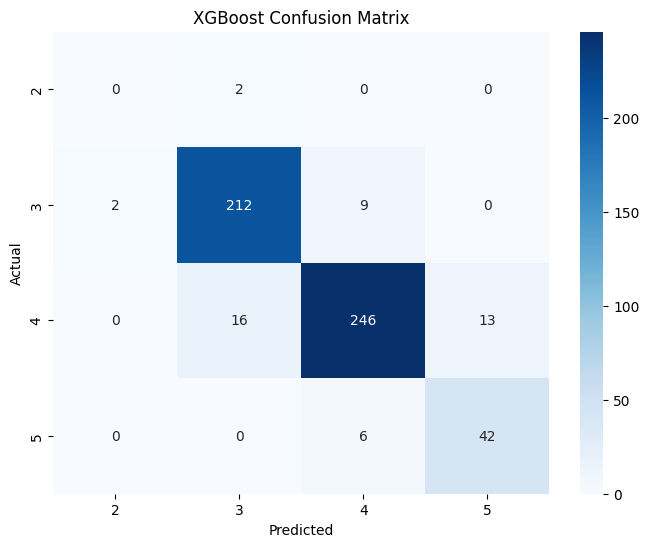

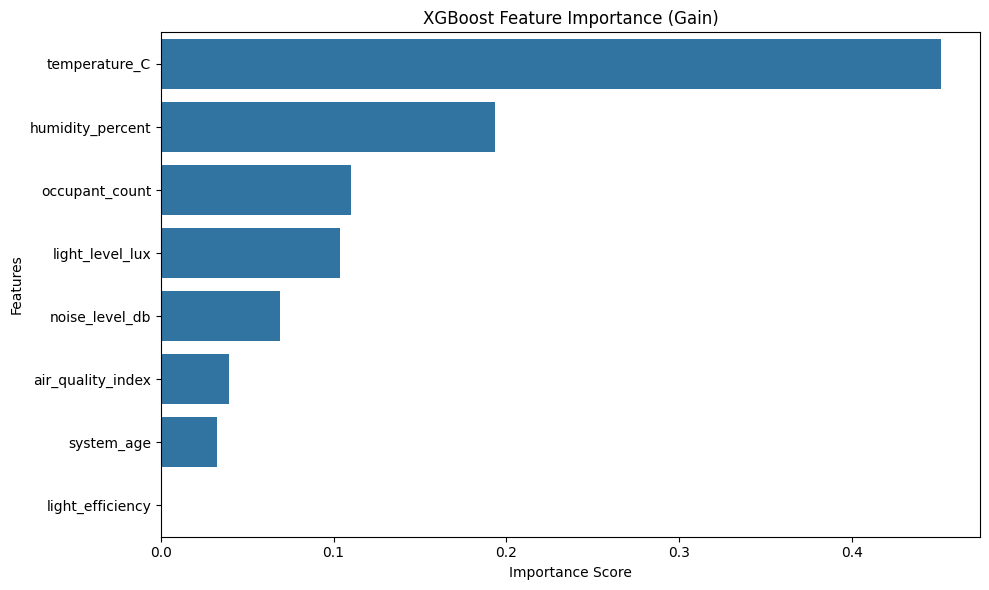

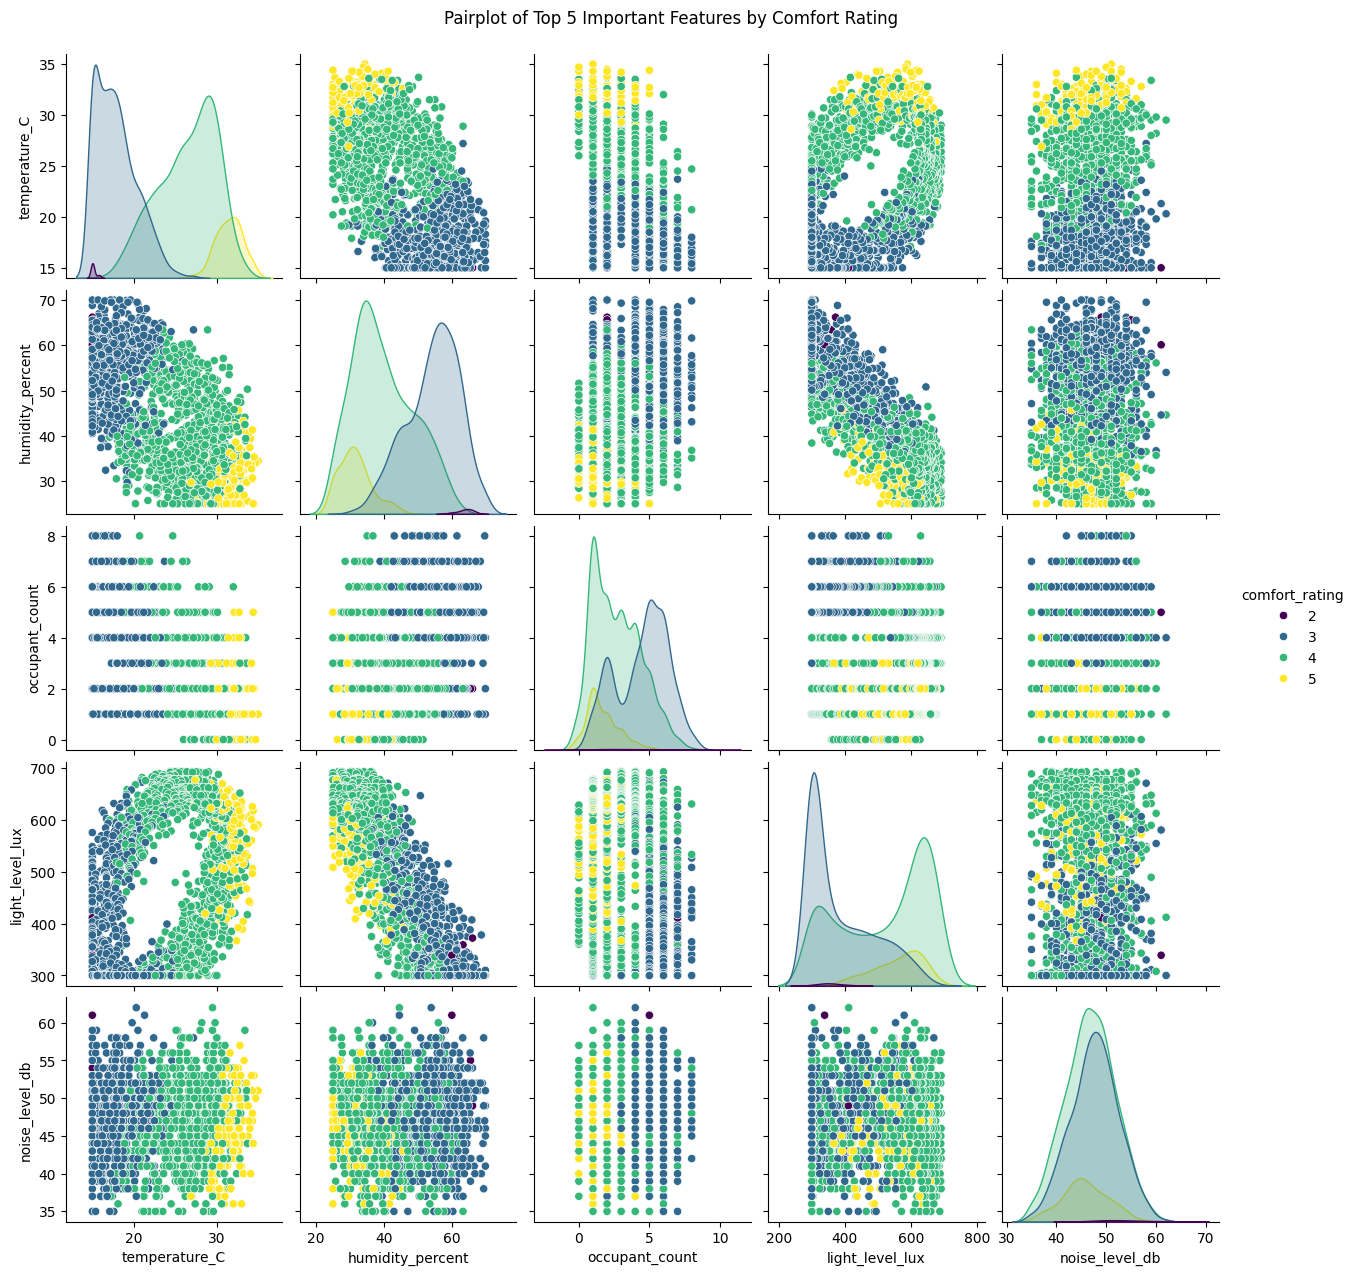

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import compute_sample_weight

# Load the data
df = pd.read_csv('c001.csv')

# Data cleaning - drop the last incomplete row
df = df.dropna()

# Convert comfort_rating to integer (since it's categorical)
df['comfort_rating'] = df['comfort_rating'].astype(int)

# 1. Enhanced Data Exploration with Class Distribution
print("\n=== Data Exploration ===")
print("First 5 rows:")
print(df.head())
print("\nClass distribution:")
print(df['comfort_rating'].value_counts())
print("\nDescriptive statistics:")
print(df.describe())

# Visualize the distribution of comfort ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='comfort_rating', data=df)
plt.title('Distribution of Comfort Ratings')
plt.show()

# 2. Feature Selection and Preprocessing with Stratified Splitting
# Select features and target
X = df.drop(['id', 'date', 'comfort_rating'], axis=1)
y = df['comfort_rating']

# For XGBoost, we need to encode labels starting from 0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Calculate class weights for handling imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. XGBoost Model with Class Weight Consideration
# Create the XGBoost classifier (removed use_label_encoder)
xgb = XGBClassifier(random_state=42,
                    objective='multi:softprob',
                    eval_metric='mlogloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3]  # Helps with imbalance
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                         cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test_scaled)
y_pred_proba = best_xgb.predict_proba(X_test_scaled)

# 4. Enhanced Model Evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Model Evaluation ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")

# Classification report with zero_division handled
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=[str(i) for i in le.classes_],
                          zero_division=0))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# 5. Feature Importance Analysis
# Get feature importance
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.title('XGBoost Feature Importance (Gain)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 6. Pairplot of Important Features
# Get top 5 important features
top_features_idx = sorted_idx[:5]
top_features = X.columns[top_features_idx]

# Create pairplot
sns.pairplot(df[top_features.tolist() + ['comfort_rating']], hue='comfort_rating', palette='viridis')
plt.suptitle('Pairplot of Top 5 Important Features by Comfort Rating', y=1.02)
plt.show()


=== Model Comparison ===
                 Model  Accuracy  Balanced Accuracy
3              XGBoost  0.919708           0.683903
1     SVM (RBF Kernel)  0.906934           0.818403
0  Logistic Regression  0.903285           0.816161
2        Random Forest  0.888686           0.625456

Best Model: XGBoost with accuracy 0.9197


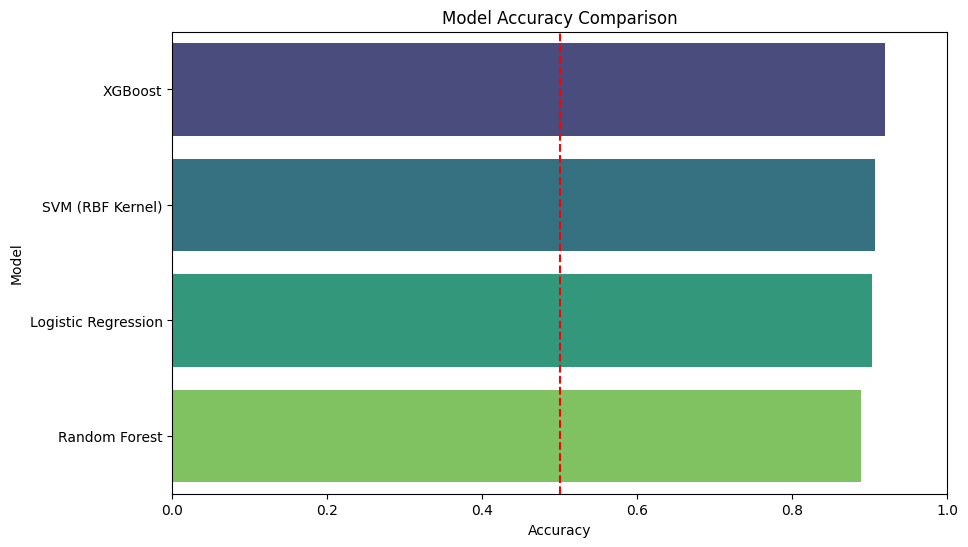


=== Detailed Evaluation for XGBoost ===
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.93      0.96      0.94       223
           4       0.94      0.91      0.92       275
           5       0.76      0.88      0.82        48

    accuracy                           0.92       548
   macro avg       0.66      0.68      0.67       548
weighted avg       0.92      0.92      0.92       548

Confusion Matrix:


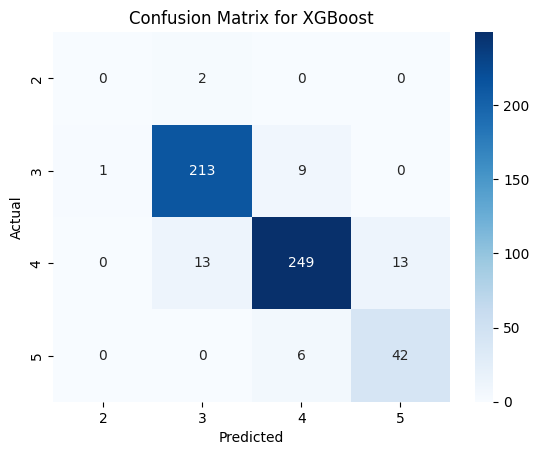


=== Feature Importance ===


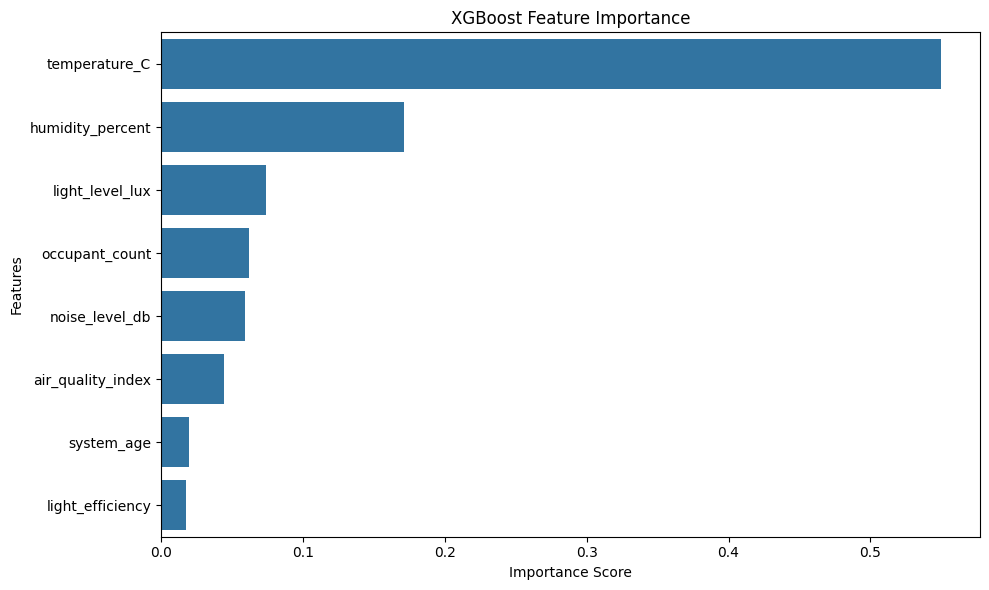

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import compute_sample_weight
from sklearn.model_selection import GridSearchCV

# Load and prepare data
df = pd.read_csv('c001.csv').dropna()
df['comfort_rating'] = df['comfort_rating'].astype(int)

X = df.drop(['id', 'date', 'comfort_rating'], axis=1)
y = df['comfort_rating']

# For XGBoost, encode labels starting from 0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(5, min(Counter(y_train).values()) - 1))
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Calculate sample weights for XGBoost
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_res)

# Initialize models with their best parameters from previous analyses
models = {
    "Logistic Regression": LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ),
    "SVM (RBF Kernel)": SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42,
        probability=True
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    ),
    "XGBoost": XGBClassifier(
        random_state=42,
        objective='multi:softprob',
        eval_metric='mlogloss',
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        min_child_weight=1
    )
}

# Train and evaluate models
results = []
for name, model in models.items():
    if name == "XGBoost":
        model.fit(X_train_scaled, y_train_res, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train_res)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_acc
    })

# Create results dataframe
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("\n=== Model Comparison ===")
print(results_df)

# Determine best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results_df.iloc[0]['Accuracy']:.4f}")

# Visual comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.show()

# Detailed evaluation of best model
print(f"\n=== Detailed Evaluation for {best_model_name} ===")
y_pred_best = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=[str(i) for i in le.classes_]))

print("Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    print("\n=== Feature Importance ===")
    feature_importance = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
    plt.title(f'{best_model_name} Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

In [12]:
# Corrected SHAP force plot visualization
try:
    import shap
    print("\nGenerating SHAP explanations...")

    # Create SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_scaled)

    # For multi-class classification, we need to handle each class separately
    class_idx = 0  # Let's explain for the first class (you can change this)

    # Get the expected value for the selected class
    if isinstance(explainer.expected_value, list):
        expected_value = explainer.expected_value[class_idx]
    else:
        expected_value = explainer.expected_value

    # Get SHAP values for the selected class
    if isinstance(shap_values, list):
        shap_values_class = shap_values[class_idx]
    else:
        shap_values_class = shap_values

    # Visualize the force plot for the first sample
    print(f"\nSHAP Force Plot for First Test Sample (Class {le.classes_[class_idx]}):")
    shap.force_plot(
        expected_value,
        shap_values_class[0,:],
        X_test_scaled[0,:],
        feature_names=X.columns,
        matplotlib=True,
        show=False
    )
    plt.title(f'SHAP Explanation for Rating {le.classes_[class_idx]} Prediction', pad=20)
    plt.tight_layout()
    plt.show()

    # Alternative waterfall plot (often more readable)
    print("\nSHAP Waterfall Plot for First Test Sample:")
    shap.plots._waterfall.waterfall_legacy(
        expected_value,
        shap_values_class[0,:],
        feature_names=X.columns,
        max_display=10
    )
    plt.show()

except Exception as e:
    print(f"Could not generate SHAP plots: {str(e)}")
    print("Make sure you have shap>=0.40.0 installed")


Generating SHAP explanations...

SHAP Force Plot for First Test Sample (Class 2):
Could not generate SHAP plots: matplotlib = True is not yet supported for force plots with multiple samples!
Make sure you have shap>=0.40.0 installed


In [13]:
!pip install --upgrade shap

In [14]:
!pip install --upgrade shap
from IPython.core.display import display, HTML
display(HTML("<style>.output_area { max-height: 10000px; }</style>"))

✅ Data loaded successfully!
📊 Class distribution:
comfort_rating
4    915
3    743
5    161
2      6
Name: count, dtype: int64
🔄 Applied SMOTE (k_neighbors=3)

🔧 Training XGBoost...

🔧 Training Random Forest...

🔧 Training SVM...

🔧 Training Logistic Regression...

🏆 Model Comparison Results:
+----+---------------------+------------+---------------------+-------------+----------+--------+
|    | Model               |   Accuracy |   Balanced Accuracy |   Precision |   Recall |     F1 |
+====+=====================+============+=====================+=============+==========+========+
|  2 | SVM                 |     0.9069 |              0.8184 |      0.6832 |   0.8184 | 0.7202 |
+----+---------------------+------------+---------------------+-------------+----------+--------+
|  3 | Logistic Regression |     0.9033 |              0.8162 |      0.6737 |   0.8162 | 0.7040 |
+----+---------------------+------------+---------------------+-------------+----------+--------+
|  0 | XGBoost      

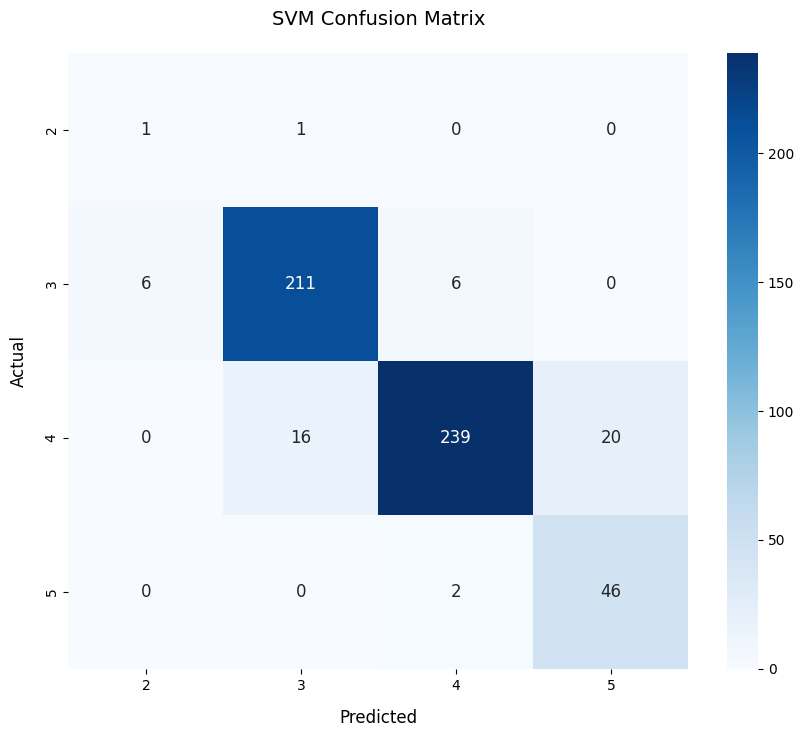


📊 Classification Report (with zero_division=0):
              precision    recall  f1-score   support

           2       0.14      0.50      0.22         2
           3       0.93      0.95      0.94       223
           4       0.97      0.87      0.92       275
           5       0.70      0.96      0.81        48

    accuracy                           0.91       548
   macro avg       0.68      0.82      0.72       548
weighted avg       0.92      0.91      0.91       548



In [15]:
# COMPLETE MODEL COMPARISON WITH PROPER METRIC HANDLING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Load and prepare data with enhanced checks
try:
    df = pd.read_csv('c001.csv').dropna()
    df['comfort_rating'] = df['comfort_rating'].astype(int)
    print("✅ Data loaded successfully!")
    print(f"📊 Class distribution:\n{df['comfort_rating'].value_counts()}")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    raise

X = df.drop(['id', 'date', 'comfort_rating'], axis=1)
y = df['comfort_rating']

# Encode labels and handle class imbalance
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Apply SMOTE only if sufficient samples exist
min_samples = min(Counter(y_train).values())
if min_samples > 1:
    smote = SMOTE(random_state=42, k_neighbors=min(5, min_samples-1))
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    print(f"🔄 Applied SMOTE (k_neighbors={min(5, min_samples-1)})")
else:
    X_train_res, y_train_res = X_train, y_train
    print("⚠️ Insufficient samples for SMOTE - using original data")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 2. Enhanced Model Comparison
models = {
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss', scale_pos_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "SVM": SVC(random_state=42, probability=True, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
}

results = []
for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics with zero_division handled
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred,
                                     target_names=[str(c) for c in le.classes_],
                                     zero_division=0,
                                     output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_acc,
        'Precision': clf_report['macro avg']['precision'],
        'Recall': clf_report['macro avg']['recall'],
        'F1': clf_report['macro avg']['f1-score']
    })

# Create and display results
results_df = pd.DataFrame(results).sort_values('F1', ascending=False)
print("\n🏆 Model Comparison Results:")
print(results_df.to_markdown(tablefmt="grid", floatfmt=".4f"))

# 3. Best Model Analysis
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n🌟 BEST MODEL: {best_model_name} 🌟")

# Enhanced Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_, yticklabels=le.classes_,
           annot_kws={"size": 12})
plt.title(f'{best_model_name} Confusion Matrix', pad=20, fontsize=14)
plt.xlabel('Predicted', labelpad=12, fontsize=12)
plt.ylabel('Actual', labelpad=12, fontsize=12)
plt.show()

# Enhanced Classification Report
print("\n📊 Classification Report (with zero_division=0):")
print(classification_report(y_test, best_model.predict(X_test_scaled),
      target_names=[str(c) for c in le.classes_],
      zero_division=0))

# Feature Importance Visualization
if hasattr(best_model, 'feature_importances_'):
    print("\n🔍 Feature Importance:")
    importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')
    plt.title(f'{best_model_name} - Top 10 Important Features', pad=20)
    plt.show()
    print(importances.head(10).to_markdown(tablefmt="grid", floatfmt=".4f"))
elif hasattr(best_model, 'coef_'):
    print("\n🔍 Feature Coefficients:")
    coefs = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=coefs.head(10), x='Coefficient', y='Feature', palette='coolwarm')
    plt.title(f'{best_model_name} - Top 10 Feature Coefficients', pad=20)
    plt.show()
    print(coefs.head(10).to_markdown(tablefmt="grid", floatfmt=".4f"))

🔄 Loading and preparing data...
✅ Data loaded! Shape: (1825, 11)
📊 Class Distribution:
|   comfort_rating |   count |
|-----------------:|--------:|
|                4 |     915 |
|                3 |     743 |
|                5 |     161 |
|                2 |       6 |
🔄 Applied SMOTE (k_neighbors=3)

🏗️ Training XGBoost...
✅ XGBoost trained with F1: 0.6747

🏗️ Training Random Forest...
✅ Random Forest trained with F1: 0.6335

🏗️ Training SVM...
✅ SVM trained with F1: 0.7202

🏗️ Training Logistic Regression...
✅ Logistic Regression trained with F1: 0.7040

🏆 Model Performance Comparison:
+----+---------------------+------------+---------------------+-------------+----------+--------+
|    | Model               |   Accuracy |   Balanced Accuracy |   Precision |   Recall |     F1 |
+====+=====================+============+=====================+=============+==========+========+
|  2 | SVM                 |     0.9069 |              0.8184 |      0.6832 |   0.8184 | 0.7202 |
+----+----

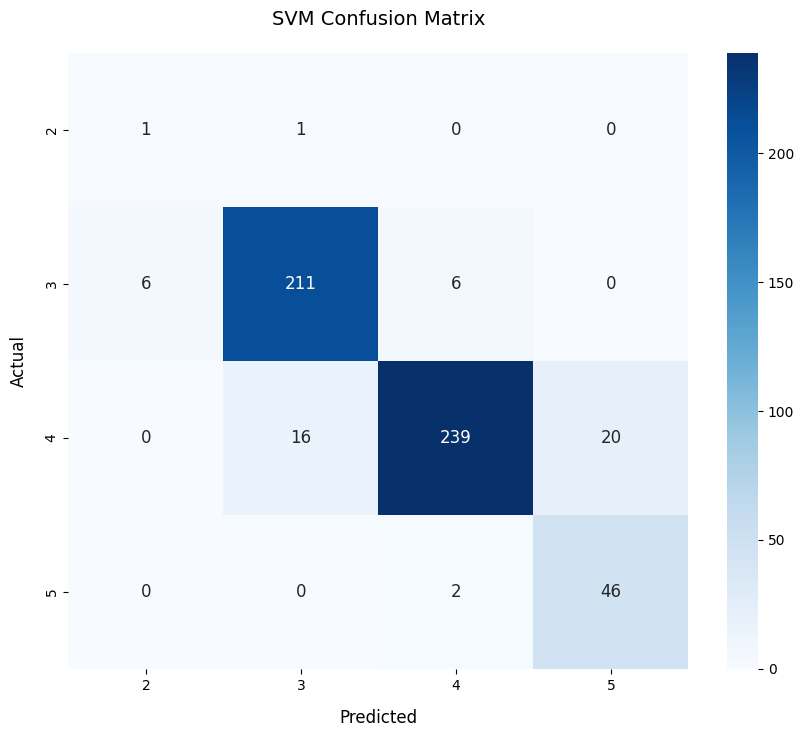


📊 Detailed Classification Report:
              precision    recall  f1-score   support

           2       0.14      0.50      0.22         2
           3       0.93      0.95      0.94       223
           4       0.97      0.87      0.92       275
           5       0.70      0.96      0.81        48

    accuracy                           0.91       548
   macro avg       0.68      0.82      0.72       548
weighted avg       0.92      0.91      0.91       548



In [16]:
# FINAL CORRECTED VERSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, balanced_accuracy_score)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Data Preparation
print("🔄 Loading and preparing data...")
try:
    df = pd.read_csv('c001.csv').dropna()
    df['comfort_rating'] = df['comfort_rating'].astype(int)
    print(f"✅ Data loaded! Shape: {df.shape}")
    print("📊 Class Distribution:\n" +
          df['comfort_rating'].value_counts().to_markdown())
except Exception as e:
    print(f"❌ Error: {e}")
    raise

X = df.drop(['id', 'date', 'comfort_rating'], axis=1)
y = df['comfort_rating']

# Encode labels and handle imbalance
le = LabelEncoder()
y_encoded = le.fit_transform(y)
n_classes = len(le.classes_)
class_names = [str(cls) for cls in le.classes_]  # Convert to strings

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Apply SMOTE only if sufficient samples
min_samples = min(Counter(y_train).values())
if min_samples > 1:
    k = min(5, min_samples-1)
    smote = SMOTE(random_state=42, k_neighbors=k)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    print(f"🔄 Applied SMOTE (k_neighbors={k})")
else:
    X_train_res, y_train_res = X_train, y_train
    print("⚠️ Using original data (insufficient samples for SMOTE)")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 2. Model Training
models = {
    "XGBoost": XGBClassifier(
        random_state=42,
        eval_metric='mlogloss',
        objective='multi:softprob',
        num_class=n_classes
    ),
    "Random Forest": RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    "SVM": SVC(
        random_state=42,
        probability=True,
        class_weight='balanced'
    ),
    "Logistic Regression": LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced',
        multi_class='multinomial'
    )
}

results = []
for name, model in models.items():
    print(f"\n🏗️ Training {name}...")
    model.fit(X_train_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics with string class names
    report = classification_report(
        y_test, y_pred,
        target_names=class_names,
        output_dict=True,
        zero_division=0
    )

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1': report['macro avg']['f1-score']
    }
    results.append(metrics)
    print(f"✅ {name} trained with F1: {metrics['F1']:.4f}")

# 3. Results Analysis
results_df = pd.DataFrame(results).sort_values('F1', ascending=False)
print("\n🏆 Model Performance Comparison:")
print(results_df.to_markdown(tablefmt="grid", floatfmt=".4f"))

# Best model details
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n🌟 BEST PERFORMER: {best_model_name} 🌟")

# Enhanced Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=class_names,
           yticklabels=class_names,
           annot_kws={"size": 12})
plt.title(f'{best_model_name} Confusion Matrix', pad=20, fontsize=14)
plt.xlabel('Predicted', labelpad=12, fontsize=12)
plt.ylabel('Actual', labelpad=12, fontsize=12)
plt.show()

# Feature Analysis
if hasattr(best_model, 'feature_importances_'):
    features = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=features.head(10), x='Importance', y='Feature', palette='viridis')
    plt.title(f'{best_model_name} Feature Importance', pad=20)
    plt.show()
    print("🔍 Top Features:\n", features.head(10).to_markdown(tablefmt="grid"))
elif hasattr(best_model, 'coef_'):
    features = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values('Coefficient', key=abs, ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=features.head(10), x='Coefficient', y='Feature', palette='coolwarm')
    plt.title(f'{best_model_name} Feature Coefficients', pad=20)
    plt.show()
    print("🔍 Top Features:\n", features.head(10).to_markdown(tablefmt="grid"))

# Final Classification Report
print("\n📊 Detailed Classification Report:")
print(classification_report(y_test, best_model.predict(X_test_scaled),
      target_names=class_names,
      zero_division=0))

In [18]:
import pickle

# Example: assume `model` is the trained model object
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [19]:
import pickle

# Replace `model` with the variable name of your trained model
# Example: model = LogisticRegression().fit(X_train, y_train)

# Save the model to a file
# Example for saving a DataFrame
with open("data.pkl", "wb") as f:
    pickle.dump(df, f)


print("Model saved as model.pkl")


Model saved as model.pkl
